# NLP Graded Project: Emotion Classification
### Student: Sreecharan Lagudu
### Student: Manoj Kumar Vuddanti
---

## Objective
The goal of this project is to build a machine learning model to classify text data into different emotions.

### Tasks Performed:
- Data loading and preprocessing
- TF-IDF vectorization
- Training a Logistic Regression model
- Evaluating the model on validation and test datasets
- Visualizing the top words contributing to each class

Validation Accuracy: 0.8630
Test Accuracy: 0.8685

Classification Report on Test Set:

              precision    recall  f1-score   support

       anger       0.90      0.82      0.86       275
        fear       0.89      0.79      0.84       224
         joy       0.84      0.96      0.89       695
        love       0.83      0.60      0.69       159
     sadness       0.90      0.93      0.92       581
    surprise       0.85      0.50      0.63        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.80      2000
weighted avg       0.87      0.87      0.86      2000



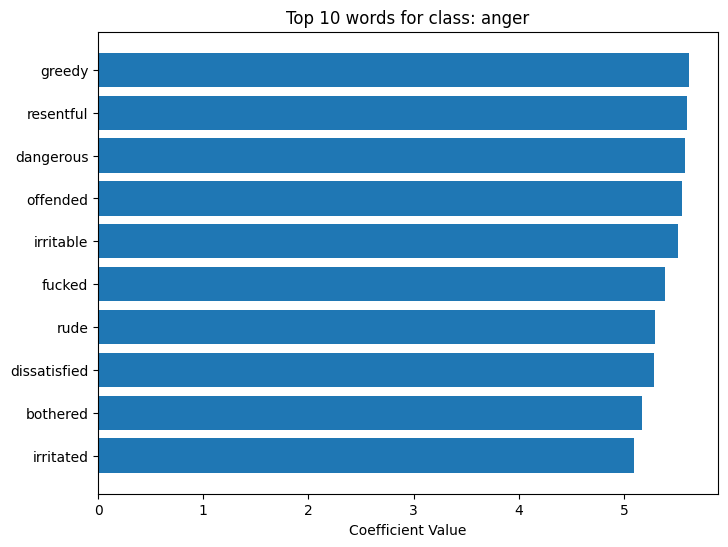

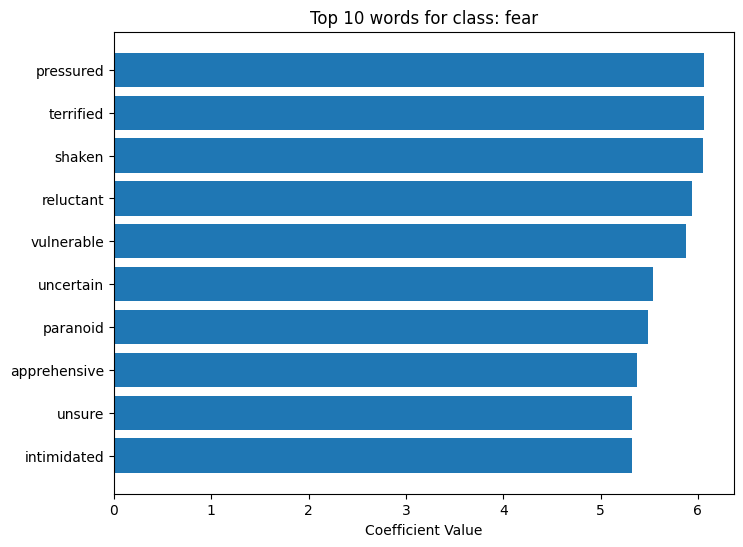

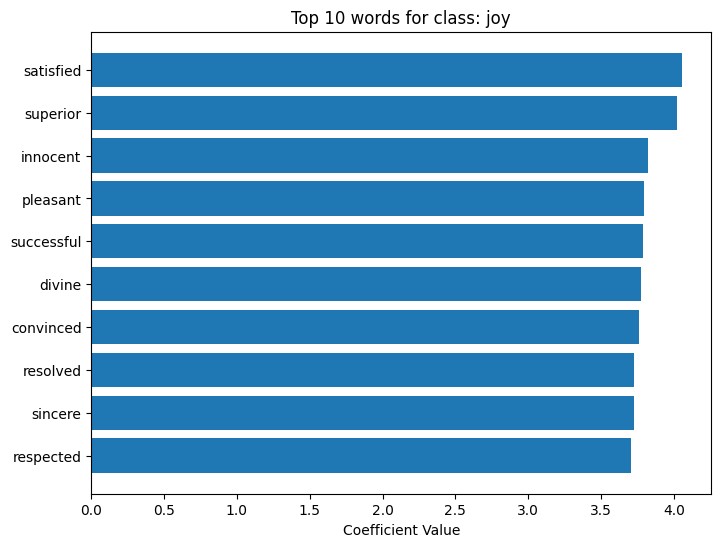

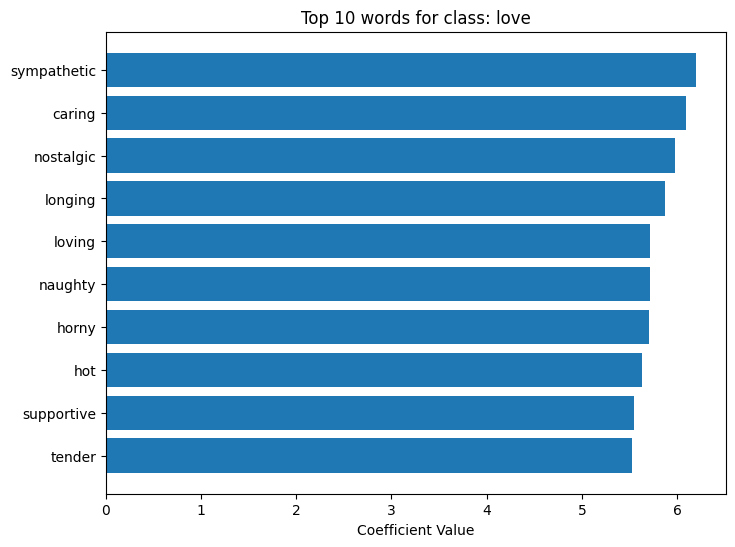

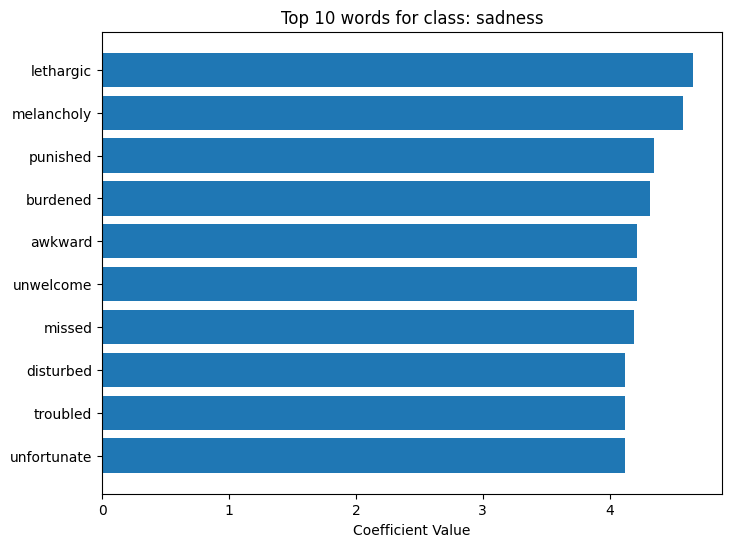

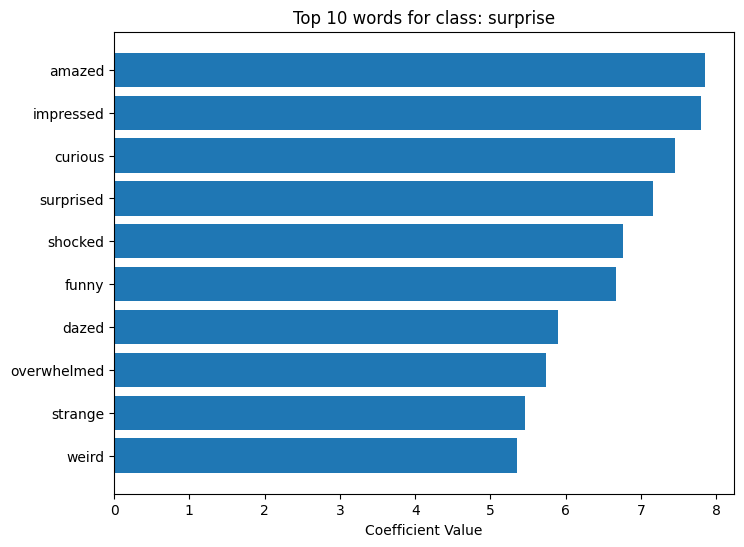

In [1]:
# ==============================================
# 1. Import Libraries
# ==============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# ==============================================
# 2. Load Dataset
# ==============================================
train_path = '/kaggle/input/nlp-emotions-dataset-exam/train.txt'
test_path = '/kaggle/input/nlp-emotions-dataset-exam/test.txt'
val_path = '/kaggle/input/nlp-emotions-dataset-exam/validation.txt'

def load_dataset(path):
    texts, labels = [], []
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            if ';' in line:
                text, label = line.strip().split(';')
                texts.append(text)
                labels.append(label)
    return pd.DataFrame({'text': texts, 'label': labels})

train_df = load_dataset(train_path)
test_df = load_dataset(test_path)
val_df = load_dataset(val_path)

# ==============================================
# 3. Preprocessing
# ==============================================
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['text'])
X_val = vectorizer.transform(val_df['text'])
X_test = vectorizer.transform(test_df['text'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['label'])
y_val = label_encoder.transform(val_df['label'])
y_test = label_encoder.transform(test_df['label'])

# ==============================================
# 4. Model Training
# ==============================================
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# ==============================================
# 5. Evaluation
# ==============================================
val_preds = log_reg.predict(X_val)
test_preds = log_reg.predict(X_test)

val_acc = accuracy_score(y_val, val_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f'Validation Accuracy: {val_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

print('\nClassification Report on Test Set:\n')
print(classification_report(y_test, test_preds, target_names=label_encoder.classes_))

# ==============================================
# 6. Visualization: Top Words per Class
# ==============================================
def plot_top_words(classifier, vectorizer, class_labels, n=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    class_labels = np.array(class_labels)

    for i, class_label in enumerate(class_labels):
        top_indices = np.argsort(classifier.coef_[i])[-n:]
        plt.figure(figsize=(8, 6))
        plt.barh(range(n), classifier.coef_[i][top_indices])
        plt.yticks(range(n), feature_names[top_indices])
        plt.xlabel('Coefficient Value')
        plt.title(f'Top {n} words for class: {class_label}')
        plt.show()

plot_top_words(log_reg, vectorizer, label_encoder.classes_)


# Conclusion

The Logistic Regression model achieved:
- **Validation Accuracy:** 86.30%
- **Test Accuracy:** 86.85%

The classification report shows the model is especially strong on **joy** and **sadness** classes but struggles a bit on **love** and **surprise** classes.

 The visualization of top words per class provided meaningful insights into which words are most influential in predicting each emotion.

 ## Possible Improvements:
- Perform hyperparameter tuning to further optimize the model.
- Try additional algorithms like Random Forest or SVM.
- Explore deep learning models (LSTM, GRU, BERT) for potentially higher accuracy.
- Address class imbalance, especially for underrepresented classes like **surprise**.

---

This project was completed following the provided instructions using Kaggle Code.